In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline


In [10]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])


In [11]:
def sig(x):
    return 1/(1+np.exp(-x))

def sig_d(x):
    return sig(x)*(1-sig(x))

In [12]:
np.random.seed(0)
n_input=2
n_hidden=4
n_output=2
W1=np.random.rand(n_input,n_hidden)
b1=np.random.rand(n_hidden)
W2=np.random.rand(n_hidden,n_output)
b2=np.random.rand(n_output)
epsilon=0.02


In [13]:
for i in range(100000):
    a2=X.dot(W1)+b1
    z2=sig(a2)
    a3=z2.dot(W2)+b2
    z3=sig(a3)
    loss= z3[range(len(X)),y]
    loss=-np.log(loss)
    loss=np.sum(loss)
    if loss and i%10000==0:
        print 'iteration %i: %f' %(i,loss)
    
    delta3=z3
    delta3[range(len(X)),y]=delta3[range(len(X)),y]-1
    
    
    dw2=z2.T.dot(delta3)
    db2=np.sum(delta3)
    
    delta2=delta3.dot(W2.T)*sig_d(a2)
    dw1=np.dot(X.T,delta2)
    db1=np.sum(delta2)
    
    W1+=-epsilon*dw1
    b1+=-epsilon*db1
    
    W2+=-epsilon*dw2
    b2+=-epsilon*db2
    
    

    

    
    

iteration 0: 0.339082
iteration 10000: 0.557326
iteration 20000: 0.210711
iteration 30000: 0.123505
iteration 40000: 0.086584
iteration 50000: 0.066449
iteration 60000: 0.053833
iteration 70000: 0.045206
iteration 80000: 0.038944
iteration 90000: 0.034194


In [14]:
def prediction(W1,W2,b1,b2,X):
    a2=np.dot(X,W1)+b1
    z2=sig(a2)
    a3=np.dot(z2,W2)+b2
    z3=sig(a3)
    return np.argmax(z3)
    
    

In [15]:
def calculate_error(W1,W2,b1,b2,X):
    a2=np.dot(X,W1)+b1
    z2=sig(a2)
    a3=np.dot(z2,W2)+b2
    z3=sig(a3)
    loss= z3[range(len(X)),y]
    loss=-np.log(loss)
    loss=np.sum(loss)
    return loss
    

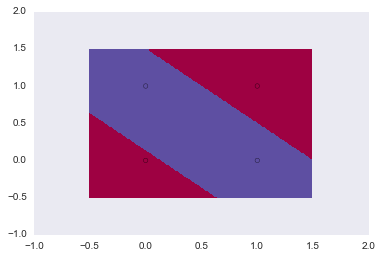

In [16]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = (np.c_[xx.ravel(), yy.ravel()])

m=Z.shape[0]
labels=[]
for i in range(m):
    myvalue=prediction(W1,W2, b1,b2,Z[i])
    if myvalue==1:
        label=1
    elif myvalue==0:
        label=0
    labels.append(label)
    
labels=np.array(labels)
labels=labels.reshape(xx.shape)
plt.pcolormesh(xx, yy, labels, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()


    
    
    